# COVID-19 and Real Estate

## Introduction
The COVID-19 significantly impacted the U.S. economy, with millions of Americans already out of work because of the crisis. In 1 year, women globally lost $800 billion in income due to Covid-19. Nearly 90 percent of New York City bar and restaurant owners couldn’t pay their rent in August. Health concerns and stay-at-home orders led to fewer buyers looking for homes and fewer sellers willing to list their properties or allow strangers to enter their homes during a pandemic. It looks like this year could be a buyer’s market for real estate. Will property prices fall due to Coronavirus impact? Should you buy a home right now? What causes real estate prices to increase?

In this project we will try to give some answers to the previous questions. We will use a Dataset available in Kaggle, which contains Realtor.com real estate monthly housing Data from 2016 to 2021, broken by State and zip code, including median list price, average list price, median days on market, total active listings, new listings, price increases, price reductions, median listing price per square foot, etc. We 

The CRISP-DM Process (Cross Industry Process for Data Mining)
The lessons leading up to the first project are about helping you go through CRISP-DM in practice from start to finish. Even when we get into the weeds of coding, try to take a step back and realize what part of the process you are in, and assure that you remember the question you are trying answer and what a solution to that question looks like.

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy

## Business Undestanding
1. Have house prices fallen in the US?
2. Which field has more effect in increasing the price of the house?
3. How the COVID-19 is affecting the housing Market?

## Data Understanding


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

##We start gathering information from the dataset RDC_Inventory_Core_Metrics_Zip_History.csv
df = pd.read_csv('./RDC_Inventory_Core_Metrics_Zip_History.csv')
df


D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,month_date_yyyymm,postal_code,zip_name,flag,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,...,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy
0,202107,33029,"hollywood, fl",*,589000.0,-0.0531,NaN,62.0,0.0333,-0.2874,...,-0.0544,6.048289e+05,-0.0577,0.1723,199.0,0.0365,-0.1532,2.209677,0.0097,0.5085
1,202107,12778,"smallwood, ny",NaN,169000.0,-0.0315,0.1267,15.0,0.0714,-0.1667,...,-0.1950,1.837562e+05,0.0315,-0.1380,16.0,0.0667,-0.1579,0.066667,-0.0048,0.0111
2,202107,12309,"schenectady, ny",NaN,349900.0,-0.0266,-0.0458,71.0,0.2456,-0.2447,...,-0.0506,3.893982e+05,-0.0873,0.0273,226.0,0.0089,-0.0960,2.183099,-0.7467,0.5235
3,202107,74074,"stillwater, ok",*,249900.0,0.0038,NaN,62.0,0.3191,-0.4095,...,-0.0808,3.097266e+05,-0.1173,-0.1517,145.0,0.0741,-0.1104,1.338710,-0.5336,0.7863
4,202107,21128,"perry hall, md",*,400000.0,-0.0475,0.0013,14.0,-0.1250,NaN,...,0.1223,4.497390e+05,0.0110,0.0389,51.0,-0.0192,1.0400,2.642857,0.3929,2.3929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913079,201607,1245,"monterey, ma",NaN,699000.0,NaN,NaN,38.0,NaN,NaN,...,NaN,1.169303e+06,NaN,NaN,42.0,NaN,NaN,0.105263,NaN,NaN
913080,201607,91104,"pasadena, ca",NaN,775000.0,NaN,NaN,52.0,NaN,NaN,...,NaN,8.190427e+05,NaN,NaN,92.0,NaN,NaN,0.769231,NaN,NaN
913081,201607,37917,"knoxville, tn",NaN,94900.0,NaN,NaN,110.0,NaN,NaN,...,NaN,1.351687e+05,NaN,NaN,177.0,NaN,NaN,0.609091,NaN,NaN
913082,201607,73501,"lawton, ok",NaN,80000.0,NaN,NaN,70.0,NaN,NaN,...,NaN,1.028383e+05,NaN,NaN,70.0,NaN,NaN,0.000000,NaN,NaN


In [44]:
#Getting a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913083 entries, 0 to 913082
Data columns (total 40 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   month_date_yyyymm                        913083 non-null  object 
 1   postal_code                              913083 non-null  object 
 2   zip_name                                 913083 non-null  object 
 3   flag                                     110663 non-null  object 
 4   median_listing_price                     913083 non-null  float64
 5   median_listing_price_mm                  714901 non-null  float64
 6   median_listing_price_yy                  655505 non-null  float64
 7   active_listing_count                     913083 non-null  float64
 8   active_listing_count_mm                  714900 non-null  float64
 9   active_listing_count_yy                  656222 non-null  float64
 10  median_days_on_market           

In [45]:
#We also see some stats numbers to undertand the numerical features
df.describe()

,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,...,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy
count,9.130830e+05,714901.000000,655505.000000,913083.000000,714900.000000,656222.000000,913083.000000,714901.000000,650146.000000,913083.000000,...,669887.000000,9.130830e+05,714901.000000,714756.000000,913083.000000,714901.000000,714756.000000,913083.000000,714900.000000,714747.000000
mean,3.588742e+05,0.008641,0.066976,72.747935,0.006479,-0.069880,81.037339,0.041977,-0.022100,24.473885,...,0.021175,4.582237e+05,0.008409,0.086662,103.434069,0.019697,0.050146,0.502002,0.027384,0.209522
std,3.841025e+05,0.118361,0.198931,86.808246,0.214548,0.446134,56.314640,0.294231,0.425191,28.445996,...,6.142771,5.912597e+05,0.160828,0.316690,118.222269,0.220425,0.961373,0.718522,0.338308,0.634399
min,5.000000e+01,-0.998500,-0.999200,13.000000,-0.811200,-0.873900,0.000000,-0.977778,-0.981002,0.000000,...,-1.000000,1.650000e+03,-0.971100,-0.988600,13.000000,-0.840000,-0.907200,0.000000,-14.087700,-21.076900
25%,1.739500e+05,-0.028300,-0.033400,24.000000,-0.087000,-0.292300,47.000000,-0.114228,-0.260504,4.000000,...,-0.073000,2.094422e+05,-0.027900,-0.037600,33.000000,-0.071400,-0.213500,0.062500,-0.047900,-0.024600
50%,2.694500e+05,0.000000,0.049500,45.000000,0.000000,-0.111100,68.000000,0.047619,-0.073171,16.000000,...,0.000000,3.177581e+05,0.002900,0.053200,66.000000,0.000000,-0.050000,0.275862,0.000000,0.039300
75%,4.100000e+05,0.035400,0.145100,88.000000,0.074100,0.085100,99.000000,0.187500,0.137725,32.000000,...,0.079000,4.998780e+05,0.036300,0.162200,128.000000,0.076900,0.162600,0.641026,0.070000,0.264600
max,1.980000e+07,44.000000,21.885200,2670.000000,68.000000,65.333300,1946.500000,33.739130,12.641975,772.000000,...,4631.000000,2.620000e+07,58.702000,43.176800,3005.000000,72.000000,353.000000,24.000000,19.378400,20.538500



## Prepare Data


In [32]:
#we need drop 913083 row with comments from authors
df = df.drop(913083)

In [33]:
#we have to drop unnecessary columns
df2 = df[['postal_code','zip_name','month_date_yyyymm','active_listing_count','average_listing_price',
          'total_listing_count','pending_ratio']]
df2

,postal_code,zip_name,month_date_yyyymm,active_listing_count,average_listing_price,total_listing_count,pending_ratio
0,33029,"hollywood, fl",202107,62.0,6.048289e+05,199.0,2.209677
1,12778,"smallwood, ny",202107,15.0,1.837562e+05,16.0,0.066667
2,12309,"schenectady, ny",202107,71.0,3.893982e+05,226.0,2.183099
3,74074,"stillwater, ok",202107,62.0,3.097266e+05,145.0,1.338710
4,21128,"perry hall, md",202107,14.0,4.497390e+05,51.0,2.642857
...,...,...,...,...,...,...,...
913078,31636,"lake park, ga",201607,66.0,2.708501e+05,66.0,0.000000
913079,1245,"monterey, ma",201607,38.0,1.169303e+06,42.0,0.105263
913080,91104,"pasadena, ca",201607,52.0,8.190427e+05,92.0,0.769231
913081,37917,"knoxville, tn",201607,110.0,1.351687e+05,177.0,0.609091


In [54]:
#this is datefrme for modeling, wi will not aggregte data
df3 = df[['postal_code','month_date_yyyymm','active_listing_count','average_listing_price',
          'total_listing_count','pending_ratio']]
#I supose we should to add column covid-time, to mark which dates are in this period
df3['covid_time'] = np.where(df3['month_date_yyyymm'].astype(np.int64) >= 201903, 1, 0)
#and we need co convert columns for modeling
df3['month_date_yyyymm_int'] = df3['month_date_yyyymm'].astype(np.int64)
df3['postal_code_int'] = df3['postal_code'].astype(np.int64)
df3

<ipython-input-54-3bca7664f384>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['covid_time'] = np.where(df3['month_date_yyyymm'].astype(np.int64) >= 201903, 1, 0)
<ipython-input-54-3bca7664f384>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['month_date_yyyymm_int'] = df3['month_date_yyyymm'].astype(np.int64)
<ipython-input-54-3bca7664f384>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,postal_code,month_date_yyyymm,active_listing_count,average_listing_price,total_listing_count,pending_ratio,covid_time,month_date_yyyymm_int,postal_code_int
0,33029,202107,62.0,6.048289e+05,199.0,2.209677,1,202107,33029
1,12778,202107,15.0,1.837562e+05,16.0,0.066667,1,202107,12778
2,12309,202107,71.0,3.893982e+05,226.0,2.183099,1,202107,12309
3,74074,202107,62.0,3.097266e+05,145.0,1.338710,1,202107,74074
4,21128,202107,14.0,4.497390e+05,51.0,2.642857,1,202107,21128
...,...,...,...,...,...,...,...,...,...
913078,31636,201607,66.0,2.708501e+05,66.0,0.000000,0,201607,31636
913079,1245,201607,38.0,1.169303e+06,42.0,0.105263,0,201607,1245
913080,91104,201607,52.0,8.190427e+05,92.0,0.769231,0,201607,91104
913081,37917,201607,110.0,1.351687e+05,177.0,0.609091,0,201607,37917


In [37]:
#I supose we should to add column covid-time, to mark which dates are in this period
df2['covid_time'] = np.where(df2['month_date_yyyymm'].astype(np.int64) >= 201903, 1, 0)
df2

<ipython-input-37-159f738a560f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid_time'] = np.where(df2['month_date_yyyymm'].astype(np.int64) >= 201903, 1, 0)


,postal_code,zip_name,month_date_yyyymm,active_listing_count,average_listing_price,total_listing_count,pending_ratio,covid_time
0,33029,"hollywood, fl",202107,62.0,6.048289e+05,199.0,2.209677,1
1,12778,"smallwood, ny",202107,15.0,1.837562e+05,16.0,0.066667,1
2,12309,"schenectady, ny",202107,71.0,3.893982e+05,226.0,2.183099,1
3,74074,"stillwater, ok",202107,62.0,3.097266e+05,145.0,1.338710,1
4,21128,"perry hall, md",202107,14.0,4.497390e+05,51.0,2.642857,1
...,...,...,...,...,...,...,...,...
913078,31636,"lake park, ga",201607,66.0,2.708501e+05,66.0,0.000000,0
913079,1245,"monterey, ma",201607,38.0,1.169303e+06,42.0,0.105263,0
913080,91104,"pasadena, ca",201607,52.0,8.190427e+05,92.0,0.769231,0
913081,37917,"knoxville, tn",201607,110.0,1.351687e+05,177.0,0.609091,0


In [38]:
#and an aggregation 
df_zip = df2.groupby(['zip_name', 'month_date_yyyymm'],as_index=False, sort=False).mean()

In [46]:
df2['month_date_yyyymm_int'] = df2['month_date_yyyymm'].astype(np.int64)


<ipython-input-46-bd36ae6a3112>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month_date_yyyymm_int'] = df2['month_date_yyyymm'].astype(np.int64)


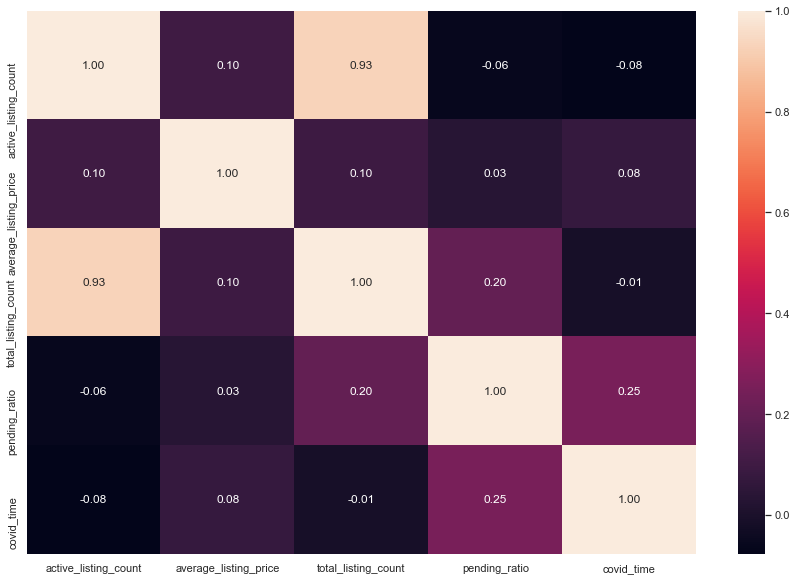

In [41]:
#For data scientists, checking correlations is an important part of the exploratory data analysis process, so in this part
#we plot a heatmap in order to check correlations between numerical features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_zip.corr(), annot=True, fmt=".2f",);


## Data Modeling

In [53]:
X = df3.drop('average_listing_price', axis=1)
y = df3['average_listing_price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
train_score


0.029957418628330235

## Evaluate the Results

### Question1 Have house prices fallen in the US?



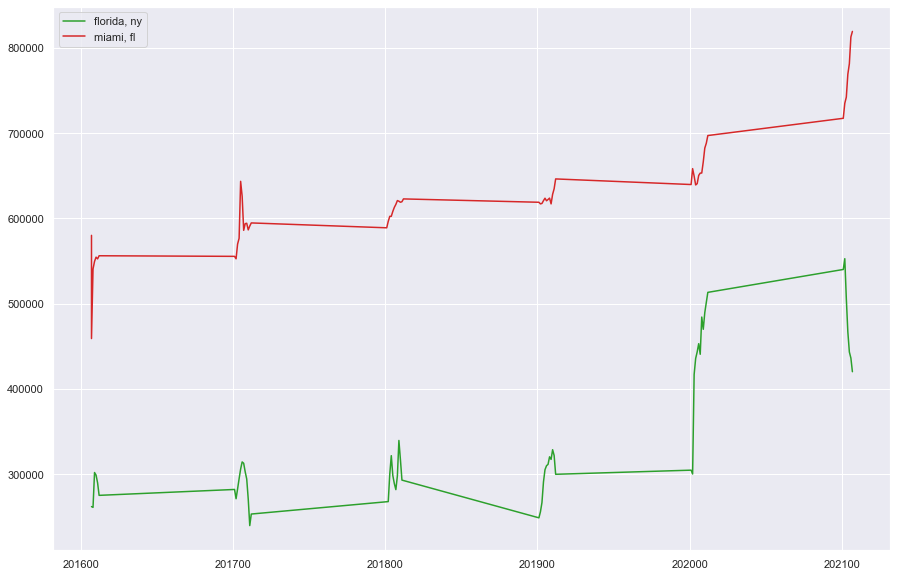

In [42]:
#we have to look on the plot with average_listing_price filed
plt.plot('month_date_yyyymm', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='florida, ny', :],label='florida, ny', color='tab:green')
plt.plot('month_date_yyyymm', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='miami, fl', :], label='miami, fl', color='tab:red')

plt.legend()
plt.show()

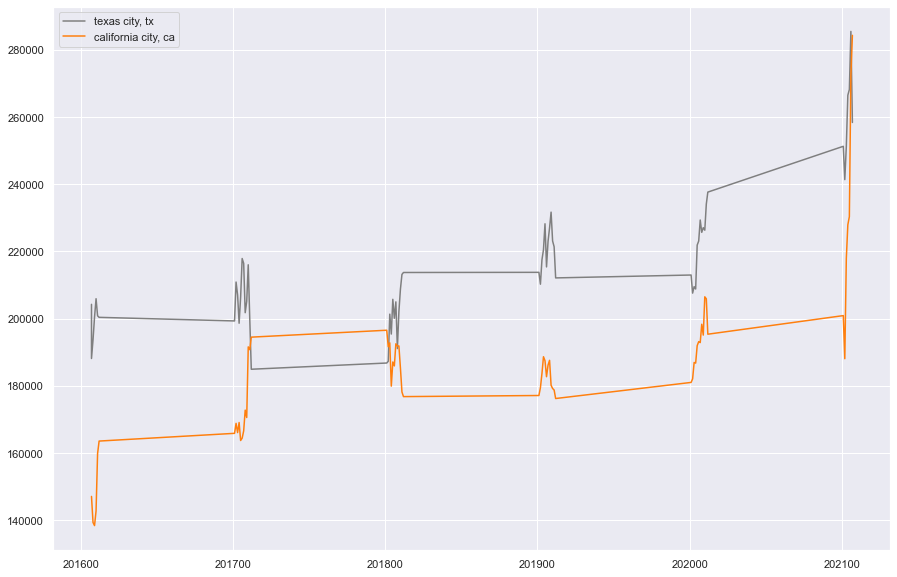

In [43]:
plt.plot('month_date_yyyymm', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='texas city, tx', :],label='texas city, tx',color='tab:grey')
plt.plot('month_date_yyyymm', 'average_listing_price', data=df_zip.loc[df_zip.zip_name=='california city, ca', :],label='california city, ca',color='tab:orange')
plt.legend()
plt.show()

#### Answer1: Not at all. In the plot above, we can observe an increasing trend of average prices over the years.

### Question2: Which field has more effect in increasing the price of the house?

In [9]:
df_zip.corr()['average_listing_price']

active_listing_count     0.102450
average_listing_price    1.000000
total_listing_count      0.096601
pending_ratio            0.031860
covid_time               0.077222
Name: average_listing_price, dtype: float64

#### Answer2: After finding the correlation of the average price with all other fields we got that active_listing_count has the highest effect in increasing the price of the houses.

### Question3: How the COVID-19 is affecting the housing Market?


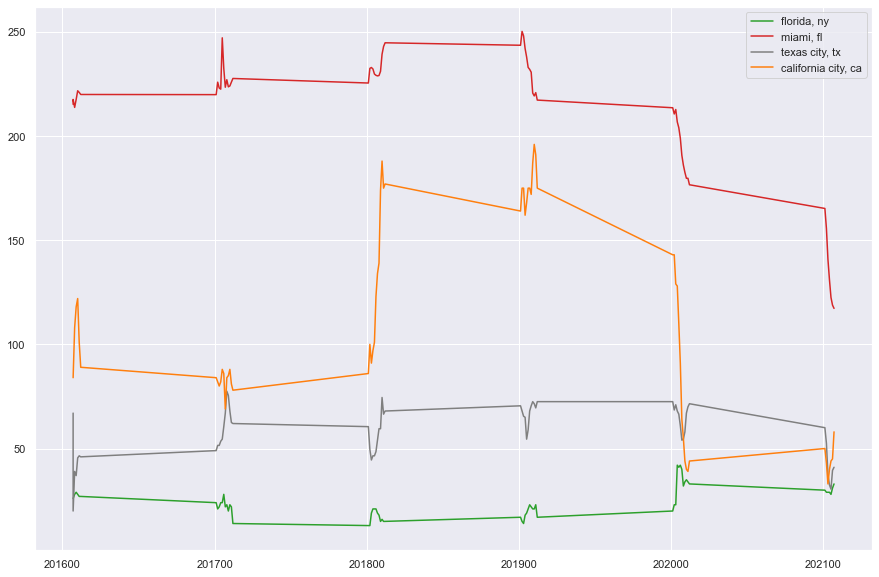

In [55]:
plt.plot('month_date_yyyymm', 'active_listing_count', data=df_zip.loc[df_zip.zip_name=='florida, ny', :],label='florida, ny', color='tab:green')
plt.plot('month_date_yyyymm', 'active_listing_count', data=df_zip.loc[df_zip.zip_name=='miami, fl', :], label='miami, fl', color='tab:red')
plt.plot('month_date_yyyymm', 'active_listing_count', data=df_zip.loc[df_zip.zip_name=='texas city, tx', :],label='texas city, tx',color='tab:grey')
plt.plot('month_date_yyyymm', 'active_listing_count', data=df_zip.loc[df_zip.zip_name=='california city, ca', :],label='california city, ca',color='tab:orange')

plt.legend()
plt.show()

#### Answer3: This graph shows that active_listing_count is reducing in most states.



### Evaluation of prediction


In [56]:
### our predictions is not good, because we dont have enought information in the dataset

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act


,actual,preds,diff
0,368244.7874,464097.520727,-95852.733327
1,240860.2572,451501.494639,-210641.237439
2,997955.5556,509899.782378,488055.773222
3,389560.1869,410653.470235,-21093.283335
4,470739.5330,244855.023797,225884.509203
...,...,...,...
273920,484226.5313,459263.690896,24962.840404
273921,551803.9324,323083.553512,228720.378888
273922,364560.0313,531174.397724,-166614.366424
273923,131867.6339,407574.206018,-275706.572118


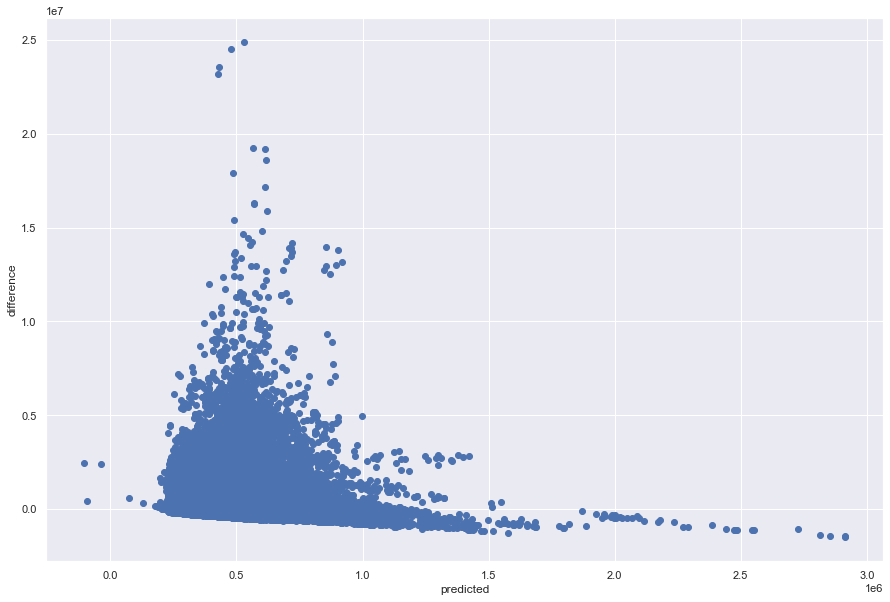

In [57]:

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');